In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib as plt
import seaborn as sns

#reading the dataset
df = pd.read_csv("AB_NYC_2019.csv")
#first five rows of dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Idecided to drop these columns as these columns do not give any value to the prediction goal, which is predicting the future prices for the airbnb
df_updated = df.drop(["id", "host_id", "last_review", "reviews_per_month"], axis = 1)
df_updated.head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [ ]:
#verifying the total number of missing values in each columns
df_updated.isna().sum()

,0
name,16
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0
number_of_reviews,0


In [ ]:
#Dropping these two columns due to having many unique values rather than using the One-Hot Encoding or Label Encoding
df_clean = df_updated.drop(["name", "host_name"], axis=1)
df_clean.isnull().sum()

,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0
number_of_reviews,0
calculated_host_listings_count,0
availability_365,0


In [ ]:
#checking column data types
df_updated.dtypes

,0
name,object
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64
minimum_nights,int64
number_of_reviews,int64


In [ ]:
df_new = df_updated.drop(columns = ["name", "host_name", "neighbourhood"])
df_new.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [ ]:
# Dropping unnecessary columns first
df_updated.drop(columns=["name", "host_name", "neighbourhood"])

# Applying LabelEncoder
le_neigh = LabelEncoder()
le_room = LabelEncoder()

df_new['neighbourhood_group_encoded'] = le_neigh.fit_transform(df_new['neighbourhood_group'])
df_new['room_type_encoded'] = le_room.fit_transform(df_new['room_type'])

df_new.head()


,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_encoded,room_type_encoded
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365,1,1
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,2,0
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,1,365,2,1
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,1,0
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,2,0


In [ ]:
df_new.drop(columns = ["neighbourhood_group", "room_type"], inplace = True)
df_new.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_encoded,room_type_encoded
0,40.64749,-73.97237,149,1,9,6,365,1,1
1,40.75362,-73.98377,225,1,45,2,355,2,0
2,40.80902,-73.94190,150,3,0,1,365,2,1
3,40.68514,-73.95976,89,1,270,1,194,1,0
4,40.79851,-73.94399,80,10,9,1,0,2,0


In [ ]:
#check for outliers
df_new.describe()


,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_encoded,room_type_encoded
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327,1.675345,0.504060
std,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289,0.735816,0.545379
min,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000,2.000000,0.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000,2.000000,1.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000,4.000000,2.000000


In [ ]:
#remove outliers from price
Q1 = df_new['price'].quantile(0.25)
Q3 = df_new['price'].quantile(0.75)
IQR = Q3 - Q1
df_new = df_new[(df_new['price'] >= Q1 - 1.5 * IQR) & (df_new['price'] <= Q3 + 1.5 * IQR)]

In [ ]:
df_new.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_encoded,room_type_encoded
count,45923.000000,45923.000000,45923.000000,45923.000000,45923.000000,45923.000000,45923.000000,45923.000000,45923.000000
mean,40.728488,-73.950733,119.970320,6.938070,23.942665,6.639701,109.378699,1.667748,0.528537
std,0.055331,0.046471,68.150148,19.857823,45.315219,31.008148,130.279393,0.747402,0.546583
min,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,40.689235,-73.981925,65.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,40.721770,-73.954370,100.000000,2.000000,5.000000,1.000000,39.000000,2.000000,1.000000
75%,40.763390,-73.934315,159.000000,5.000000,24.000000,2.000000,217.000000,2.000000,1.000000
max,40.913060,-73.712990,334.000000,1250.000000,629.000000,327.000000,365.000000,4.000000,2.000000


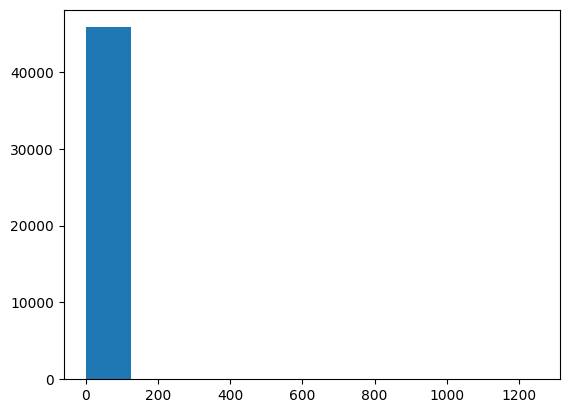

In [ ]:
from matplotlib import pyplot as plt
plt.hist(df_new["minimum_nights"])
plt.show()

In [ ]:
Q1 = df_new['minimum_nights'].quantile(0.25)
Q3 = df_new['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1
df_new = df_new[(df_new['minimum_nights'] >= Q1 - 1.5 * IQR) & (df_new['minimum_nights'] <= Q3 + 1.5 * IQR)]

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
X = df_new.drop(columns = ["price"])
y = df_new["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


Mean Squared Error: 2523.703162578267
R-squared: 0.44104732408822234
